# Pokemon Data Analysis 


In this nootebook I'm going to analyse pokemons stats from the games, such as, their HP, Attack and Deffense mainly.
Creating sub arrays for legendaries and non legendaries, and later on, ploting and comparing between the two.
Here's where the dataset is from: [https://www.kaggle.com/abcsds/pokemon].

## Downloading the Dataset

#### Dataset details: In the dataset there's a total of 721 different pokemons (800 rows in total), with 13 columns, wich are:
* #: ID for each pokemon;
* Name: Name of each pokemon;
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks;
* Type 2: Some pokemon are dual type and have 2;
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is (I will be changing the placement for better understanding);
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting;
* Attack: the base modifier for normal attacks (eg. Scratch, Punch);
* Defense: the base damage resistance against normal attacks;
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam);
* SP Def: the base damage resistance against special attacks;
* Speed: determines which pokemon attacks first each round.

In [1]:
#Importing some libs
import os
import pandas as pd
import numpy as np

In [2]:
#!pip install jovian opendatasets --upgrade --quiet

In [3]:
dataset_url = 'https://www.kaggle.com/abcsds/pokemon?select=Pokemon.csv' 

In [4]:
import opendatasets as od
od.download(dataset_url)

In [5]:
data_dir = './pokemon'

In [6]:
os.listdir(data_dir)

['Pokemon.csv']

## Data Preparation and Cleaning

In this section, after loading the csv file, I will be changing the 'Total' column position from the begginig of the table to after the 'Speed' column since the 'Total' is the sum of hp, attack, defense, attack speed, defense speed and speed.

I will not be droping any rows since there is no missing values!

In [7]:
poke_df = pd.read_csv('./pokemon/Pokemon.csv')
poke_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
cols = list(poke_df.columns.values)
cols

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [9]:
#Changing the 'Total' position
poke_df = poke_df[['#', 'Name', 'Type 1','Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Generation', 'Legendary']]
poke_df.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,1,False


In [10]:
#Looking up missing values
poke_df.isna().sum()   #Not all pokemons have a second type

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Total           0
Generation      0
Legendary       0
dtype: int64

In [11]:
poke_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,435.10250,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,119.96304,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.00000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,330.00000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,450.00000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.00000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,780.00000,6.00000


## Exploratory Analysis and Visualization

I will be creating subarrays with legendaries to be compared within the types that are legendaries, and also against those that aren't.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
#All the unique values on 'Type 1'
unique_types1 = poke_df['Type 1'].nunique()
print('There is', unique_types1, 'types of pokemons.')

There is 18 types of pokemons.


In [14]:
#All the type
poke_df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [15]:
#Total attack of some types that has the same number of pokemon ex. ghost, dragon, ground
all_ghost_type = poke_df.loc[poke_df['Type 1'] == 'Ghost']
all_ghost_type.reset_index(drop=True, inplace=True)
all_ghost_type.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
0,92,Gastly,Ghost,Poison,30,35,30,100,35,80,310,1,False
1,93,Haunter,Ghost,Poison,45,50,45,115,55,95,405,1,False
2,94,Gengar,Ghost,Poison,60,65,60,130,75,110,500,1,False
3,94,GengarMega Gengar,Ghost,Poison,60,65,80,170,95,130,600,1,False
4,200,Misdreavus,Ghost,NaN,60,60,60,85,85,85,435,2,False


In [16]:
#Doing the same for 'Dragon' and 'Ground'
all_dragon_type = poke_df.loc[poke_df['Type 1'] == 'Dragon']

all_ground_type = poke_df.loc[poke_df['Type 1'] == 'Ground']

In [17]:
#Comparing the attack sum of each one
all_ghost_type['Attack'].sum(), all_dragon_type['Attack'].sum(), all_ground_type['Attack'].sum()

(2361, 3588, 3064)

In [18]:
#How many legendaries do we have on those 3 subsets
dragon_legendary = all_dragon_type.loc[all_dragon_type['Legendary'] == True]

ghost_legendary = all_ghost_type.loc[all_ghost_type['Legendary'] == True]

ground_legendary = all_ground_type.loc[all_ground_type['Legendary'] == True]

#How many legendaries are in each one
len(dragon_legendary), len(ghost_legendary), len(ground_legendary)

(12, 2, 4)

In [19]:
#Who out of the dragon legendaries has the highest attack?
dragon_legendary.sort_values('Attack', ascending=False).head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,780,3,True
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,700,5,True
425,384,Rayquaza,Dragon,Flying,105,150,90,150,90,95,680,3,True
707,644,Zekrom,Dragon,Electric,100,150,120,120,100,90,680,5,True
420,381,LatiosMega Latios,Dragon,Psychic,80,130,100,160,120,110,700,3,True


In [20]:
import matplotlib.pyplot as plt

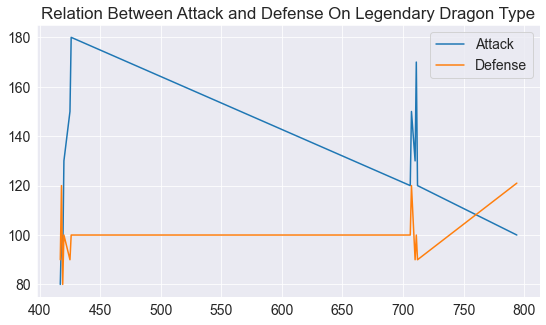

In [21]:
plt.plot(dragon_legendary.Attack)
plt.plot(dragon_legendary.Defense)

plt.title('Relation Between Attack and Defense On Legendary Dragon Type')
plt.legend(['Attack', 'Defense']);

In [22]:
#Is the attack higher than the non legendary?
all_dragon_type.sort_values('Attack', ascending=False).head(5) #The non legendary is 10pts behind

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,780,3,True
494,445,GarchompMega Garchomp,Dragon,Ground,108,170,115,120,95,92,700,4,False
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,700,5,True
707,644,Zekrom,Dragon,Electric,100,150,120,120,100,90,680,5,True
425,384,Rayquaza,Dragon,Flying,105,150,90,150,90,95,680,3,True


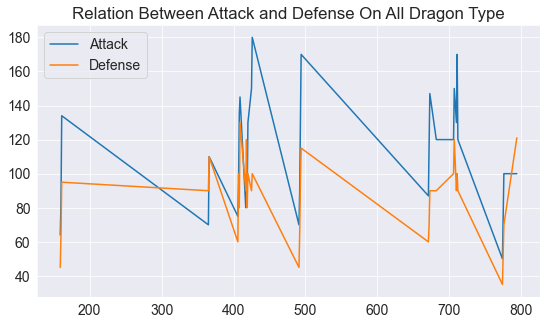

In [23]:
plt.plot(all_dragon_type.Attack)
plt.plot(all_dragon_type.Defense)

plt.title('Relation Between Attack and Defense On All Dragon Type')
plt.legend(['Attack', 'Defense']);

In [24]:
ground_legendary.sort_values('Attack', ascending=False).head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,770,3,True
423,383,Groudon,Ground,NaN,100,150,140,100,90,90,670,3,True
709,645,LandorusTherian Forme,Ground,Flying,89,145,90,105,80,91,600,5,True
708,645,LandorusIncarnate Forme,Ground,Flying,89,125,90,115,80,101,600,5,True


In [25]:
ghost_legendary.sort_values('Attack', ascending=False).head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
16,487,GiratinaOrigin Forme,Ghost,Dragon,150,120,100,120,100,90,680,4,True
15,487,GiratinaAltered Forme,Ghost,Dragon,150,100,120,100,120,90,680,4,True


Creating subsets for legendaries pokemons and those that aren't.

In [26]:
#Getting all the legendaries and not legendaries for comparison
all_legendary = poke_df.loc[poke_df['Legendary'] == True]
all_legendary.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,580,1,True
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,580,1,True
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,580,1,True
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,680,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,780,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,780,1,True
262,243,Raikou,Electric,NaN,90,85,75,115,100,115,580,2,True
263,244,Entei,Fire,NaN,115,115,85,90,75,100,580,2,True
264,245,Suicune,Water,NaN,100,75,115,90,115,85,580,2,True
269,249,Lugia,Psychic,Flying,106,90,130,90,154,110,680,2,True


In [27]:
not_legendary = poke_df.loc[poke_df['Legendary'] == False]
not_legendary.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,534,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,634,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,634,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,314,1,False


In [28]:
len(all_legendary), len(not_legendary)

(65, 735)

In [29]:
#looking up the top 3 attack pokemons and sorting by highest total
all_legendary.sort_values('Total', ascending=False).head(5)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,780,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,780,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,780,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,770,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,770,3,True


In [30]:
#The same for the non legenaries
not_legendary.sort_values('Total', ascending=False).head(5)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
413,376,MetagrossMega Metagross,Steel,Psychic,80,145,150,105,110,110,700,3,False
494,445,GarchompMega Garchomp,Dragon,Ground,108,170,115,120,95,92,700,4,False
409,373,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,90,120,700,3,False
268,248,TyranitarMega Tyranitar,Rock,Dark,100,164,150,95,120,71,700,2,False
313,289,Slaking,Normal,NaN,150,160,100,95,65,100,670,3,False


In [31]:
all_legendary[['Attack', 'Defense', 'HP']].mean(), len(all_legendary)

(Attack     116.676923
 Defense     99.661538
 HP          92.738462
 dtype: float64,
 65)

In [32]:
not_legendary[['Attack', 'Defense', 'HP']].mean(), len(not_legendary)

(Attack     75.669388
 Defense    71.559184
 HP         67.182313
 dtype: float64,
 735)

### Ploting the differences between legendaries and not legendaries 

Destribution of attack and defense points from legendaries and not legendaries pokemons.
Is there a significant improvement in the attack/defense between legendaries and non legendaries?

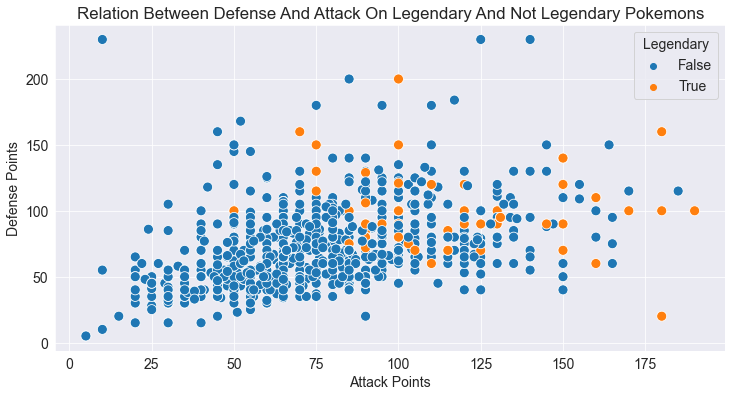

In [33]:
plt.figure(figsize=(12,6))
plt.title("Relation Between Defense And Attack On Legendary And Not Legendary Pokemons")
plt.xlabel('Attack Points')
plt.ylabel('Defense Points')

sns.scatterplot(x=poke_df['Attack'], y=poke_df['Defense'], hue=poke_df['Legendary'], s=100);

It doesn't seem to be legendaries below 50 points of attack and 100 points of defense, but beyond those number the legendary pokemons seem to be spread not much diffently from the non legendaries.

### Relation between attack and defense (legendary).

Relation between attack and defense on legendaries.
Unfortunately there are only 65 different legendary pokemon to be analyzed,

In [34]:
all_legendary = all_legendary.sort_values('Attack', ascending=False)

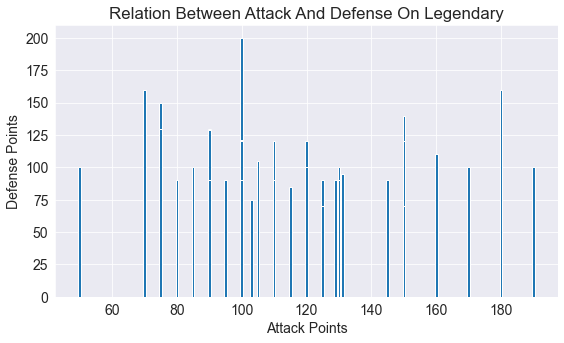

In [35]:
plt.title('Relation Between Attack And Defense On Legendary')
plt.xlabel('Attack Points')
plt.ylabel('Defense Points')
plt.bar(all_legendary.Attack, all_legendary.Defense);

### Relation between attack and defense (common).


Relation between attack and defense on not legendaries

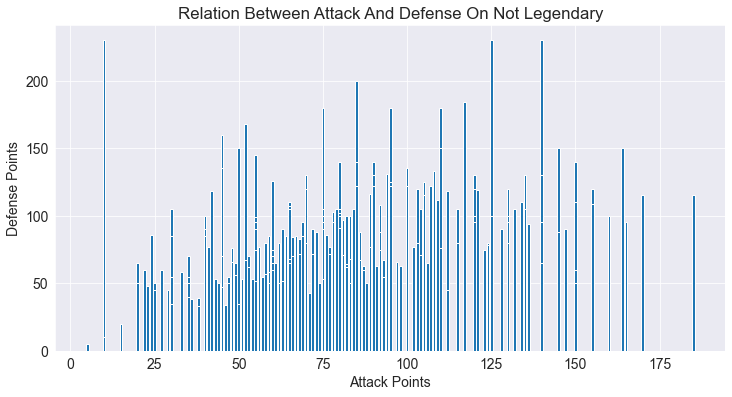

In [36]:
plt.figure(figsize=(12,6))
plt.title('Relation Between Attack And Defense On Not Legendary')
plt.xlabel('Attack Points')
plt.ylabel('Defense Points')
plt.bar(not_legendary.Attack, not_legendary.Defense);

### Types distribution 

Each types has the highest attacks!


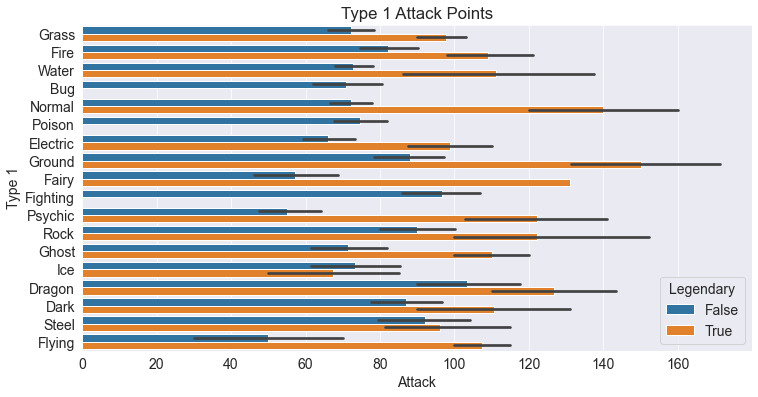

In [37]:
plt.figure(figsize=(12,6))
plt.title("Type 1 Attack Points")
sns.barplot(x='Attack', y='Type 1', hue='Legendary', data=poke_df);

### Destribution of attack values between each type

Destribution of attack points within the types, and the diffence if legendary.


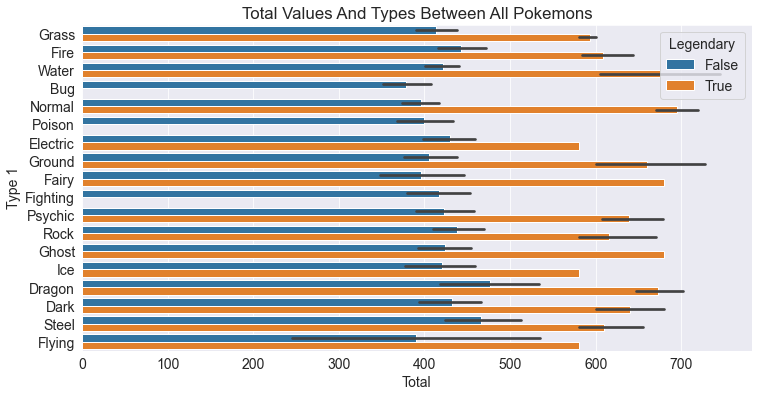

In [38]:
plt.figure(figsize=(12,6))
plt.title("Total Values And Types Between All Pokemons")
sns.barplot(x='Total', y='Type 1', hue='Legendary', data=poke_df);

### Destribution of defense values between each type

Destribution of defense points within the types, and the diffence if legendary.


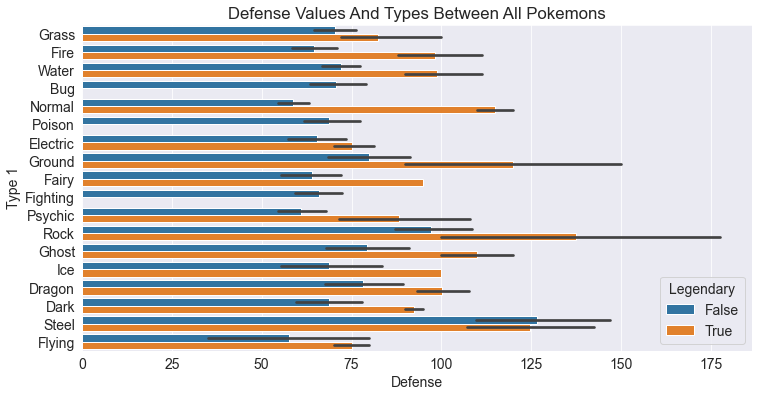

In [39]:
plt.figure(figsize=(12,6))
plt.title("Defense Values And Types Between All Pokemons")
sns.barplot(x='Defense', y='Type 1', hue='Legendary', data=poke_df);

### Each types has the highest total within the legendaries.


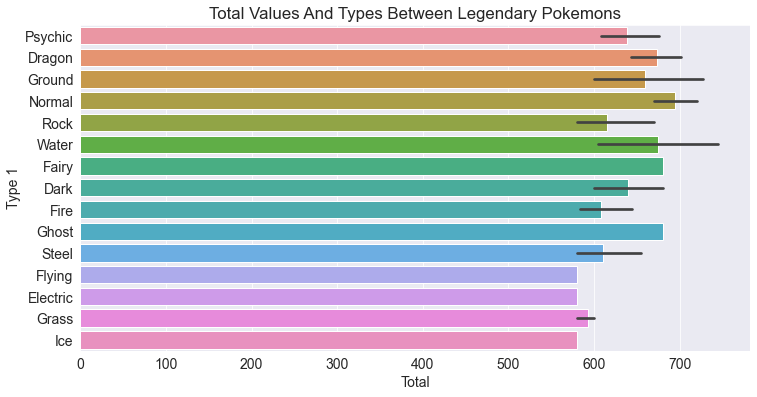

In [40]:
plt.figure(figsize=(12,6))
plt.title("Total Values And Types Between Legendary Pokemons")
sns.barplot(x='Total', y='Type 1', data=all_legendary);

### Destribution of total values within types for non legendaries.


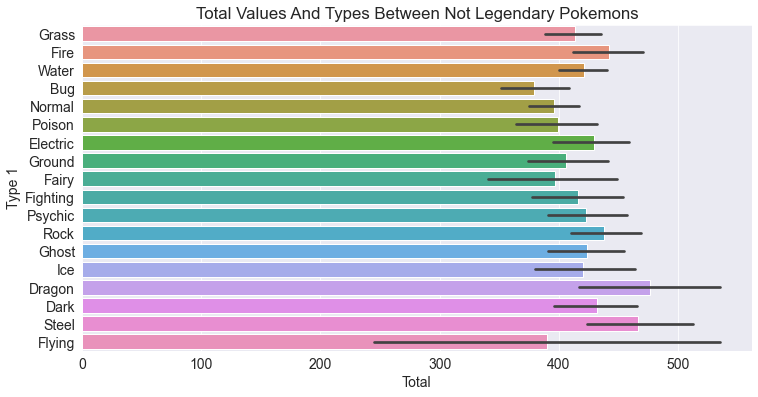

In [41]:
plt.figure(figsize=(12,6))
plt.title("Total Values And Types Between Not Legendary Pokemons")
sns.barplot(x='Total', y='Type 1', data=not_legendary);

## Asking and Answering Questions

I'll be exploring a bit within type 1 and type 2 pokemons, and their value distributions.
Also if the newest generations have better stats!


#### Q1: Each types 2 within all dragon type 1 has the highest total values?

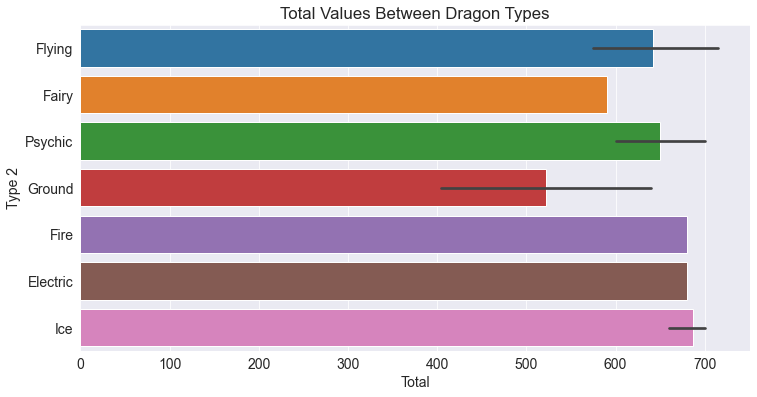

In [42]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between Dragon Types")
sns.barplot(x='Total', y='Type 2', data=all_dragon_type);

Dragon type 1 and Ice type 2 has the highest total value!

#### Generation Relation

Does the generation of legendary dragon pokemon correlate with its total value?

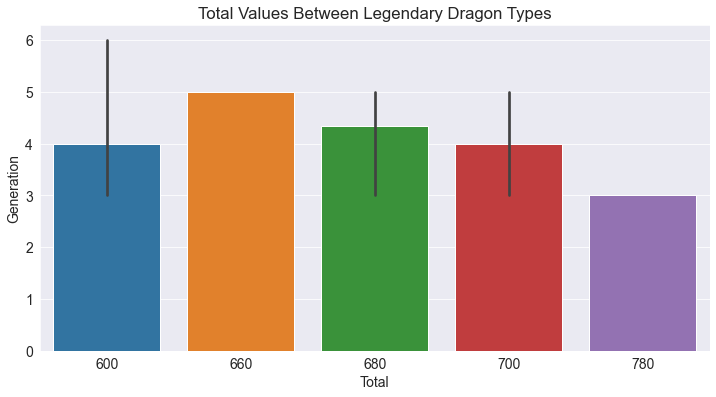

In [43]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between Legendary Dragon Types")
sns.barplot(x='Total', y='Generation', data=dragon_legendary);

It seems that the 4th and 3rd generations has higher total values!

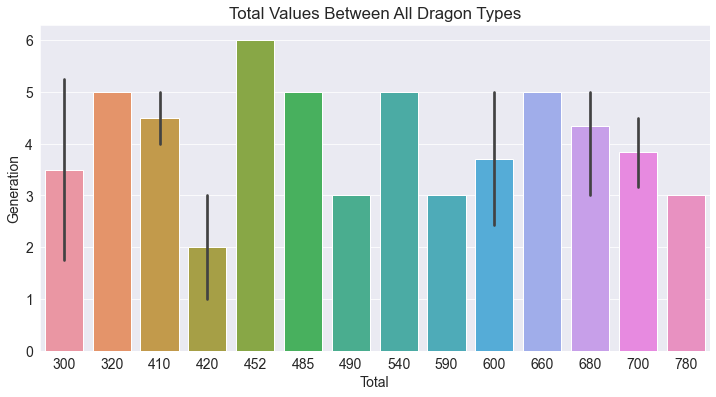

In [44]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between All Dragon Types")
sns.barplot(x='Total', y='Generation', data=all_dragon_type);

It appears the same within non legendaries type.

#### Q2: Each types 2 within all ground type 1 has the highest total values?

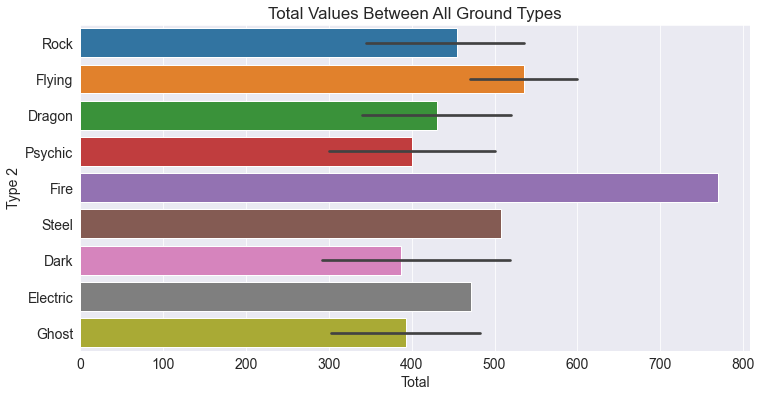

In [45]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between All Ground Types")
sns.barplot(x='Total', y='Type 2', data=all_ground_type);

Fire is the best type 2 for ground types 1.

#### Generation relation
Does the generation of legendary ground pokemon correlate with its total value?

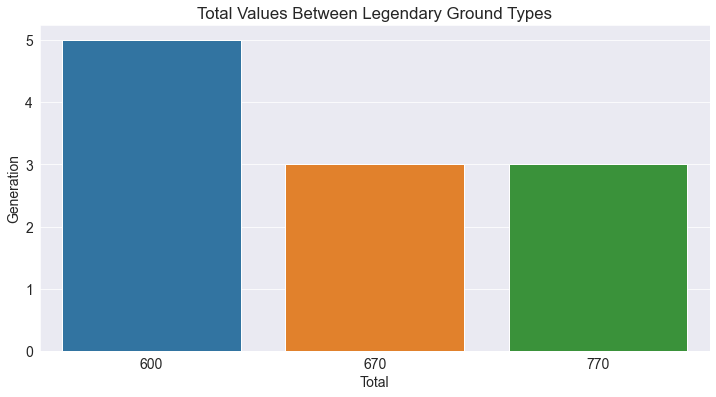

In [46]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between Legendary Ground Types")
sns.barplot(x='Total', y='Generation', data=ground_legendary);

This time generation 3 has the best stats, different from dragon, in wich the best stats are also within generation 4.
#### What about all ground types?

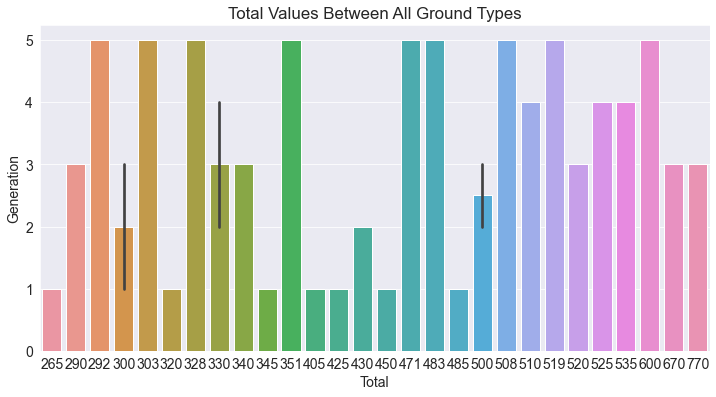

In [47]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between All Ground Types")
sns.barplot(x='Total', y='Generation', data=all_ground_type);

The highest stats also seem to be best at the 3rd and 4th gens.

#### Q3: Each types 2 within all ghost type 1 has the highest total values?

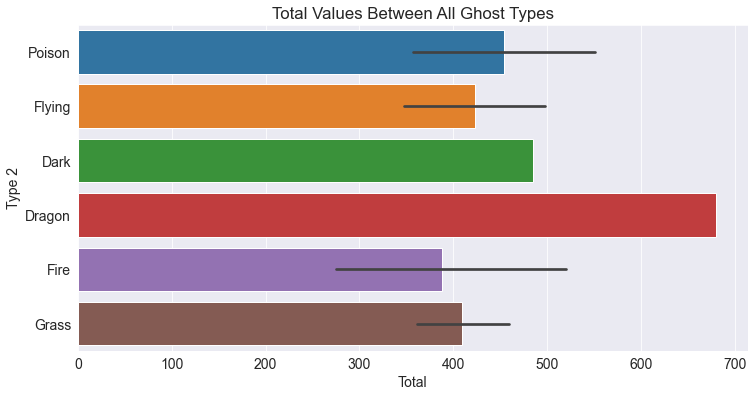

In [48]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between All Ghost Types")
sns.barplot(x='Total', y='Type 2', data=all_ghost_type);

#### Generation Relation
Does the generation of legendary ghost pokemon correlate with its total value?

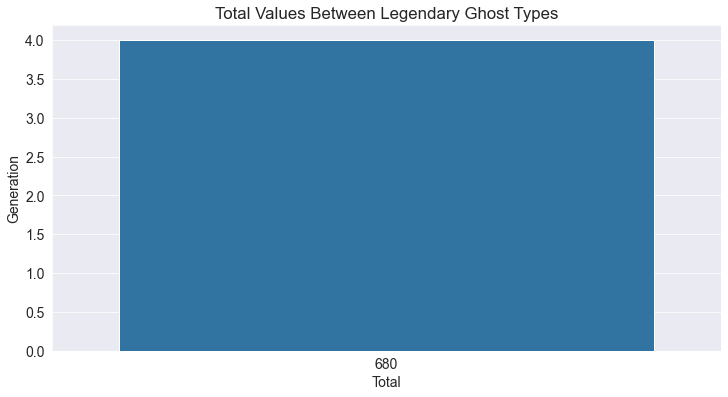

In [49]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between Legendary Ghost Types")
sns.barplot(x='Total', y='Generation', data=ghost_legendary);

Theres only 2 legendary Ghost type, both belonging to the 4th generation.

In [50]:
ghost_legendary.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
15,487,GiratinaAltered Forme,Ghost,Dragon,150,100,120,100,120,90,680,4,True
16,487,GiratinaOrigin Forme,Ghost,Dragon,150,120,100,120,100,90,680,4,True


#### What about all ghost types?

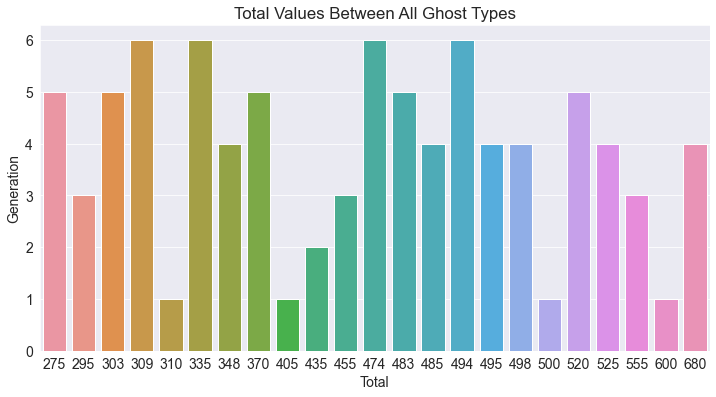

In [51]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between All Ghost Types")
sns.barplot(x='Total', y='Generation', data=all_ghost_type);

The highest total values are all well distribuited between all generation, 4th containing the highest.

#### Q5: Each types 2 within all fighting type 1 has the highest total values?

In [52]:
all_fighting_type = poke_df.loc[poke_df['Type 1'] == 'Fighting']
fighting_legendary = all_fighting_type.loc[all_fighting_type['Legendary'] == True]
all_fighting_type.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
61,56,Mankey,Fighting,NaN,40,80,35,35,45,70,305,1,False
62,57,Primeape,Fighting,NaN,65,105,60,60,70,95,455,1,False
72,66,Machop,Fighting,NaN,70,80,50,35,35,35,305,1,False
73,67,Machoke,Fighting,NaN,80,100,70,50,60,45,405,1,False
74,68,Machamp,Fighting,NaN,90,130,80,65,85,55,505,1,False


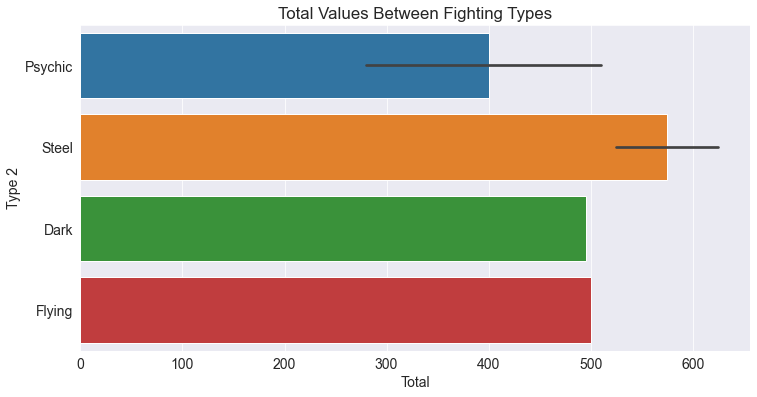

In [53]:
plt.figure(figsize=(12,6))
plt.title("Total Values Between Fighting Types")
sns.barplot(x='Total', y='Type 2', data=all_fighting_type);

Fighting type 1 and steel type 2 seems to be the best combination for non legendaries.
#### What about legendaries fighting type 1?

In [54]:
len(fighting_legendary)
#plt.figure(figsize=(12,6))
#plt.title("Total Values Between Legendary Fighting Types")
#sns.barplot(x='Total', y='Type 2', data=fighting_legendary);

0

There is no legendary fighting types.

#### Generation distribuiton within fighting types.

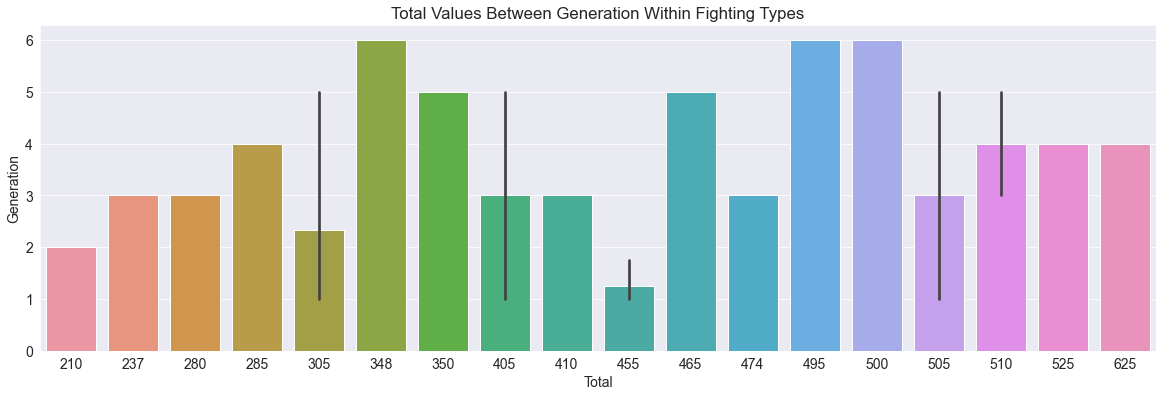

In [55]:
plt.figure(figsize=(20,6))
plt.title("Total Values Between Generation Within Fighting Types")
sns.barplot(x='Total', y='Generation', data=all_fighting_type);

The best total values within the fighting type 1 are distributed mostly between the 4th and 6th generation, 4th containing the 3 highest ones.

## Inferences and Conclusion

The main focus of this particular data analysis was to visualize if there was a consireable difference between legendaries types and non legendaries ones, and its generation distribution.

It is possible to see from the first cluster plot that most legendaries are found to be within a high rage of total values (the sum of attack, defense, attack speed, defense speed, speed points), but there is a close number of "regular" pokemons not far behind.

But legendary pokemons still take most of the top 20, being that theres only 65 of them.

In [56]:
poke_df.sort_values('Total', ascending=False).head(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,780,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,780,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,780,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,770,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,770,3,True
552,493,Arceus,Normal,NaN,120,120,120,120,120,120,720,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,700,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,700,5,True
409,373,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,90,120,700,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,80,145,150,105,110,110,700,3,False


In [57]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>